In [157]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive/goalscorers.csv
archive/test.csv
archive/Fifa_Worldcup_2022_Groups.csv
archive/shootouts.csv
archive/fifa_ranking-2023-07-20.csv
archive/2024_UEFA_Euro_Group_Matches.csv
archive/results.csv
archive/fifa_ranking-2022-10-06.csv
archive/Fifa_Worldcup_2022_Groups的副本.csv


In [158]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import Markdown as md
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from datetime import datetime
import warnings

# warnings.filterwarnings("ignore")

In [159]:
# pip install ipywidgets

In [160]:
import plotly.graph_objs as go 

In [161]:
df =  pd.read_csv("archive/results.csv")
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [162]:
rank = pd.read_csv('archive/fifa_ranking-2022-10-06.csv')

rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2020-1-1")].reset_index(drop=True)

In [163]:
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
df["date"] = pd.to_datetime(df["date"])
df = df[(df["date"] >= "2020-1-1")].reset_index(drop=True)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2020-01-07,Barbados,Canada,1,4,Friendly,Irvine,United States,True
1,2020-01-09,Moldova,Sweden,0,1,Friendly,Doha,Qatar,True
2,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
3,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
4,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True


In [164]:
rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2020-02-20,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
1,2020-02-21,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
2,2020-02-22,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
3,2020-02-23,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
4,2020-02-24,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC


In [165]:
ranking_df = pd.pivot_table(data = rank, 
                            values = 'total_points',
                            index = 'country_full',
                            columns = 'rank_date').fillna(0.0)
ranking_df.head()

rank_date,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06
country_full,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,...,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04
Albania,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,...,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1354.11
Algeria,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,...,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1489.10
American Samoa,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,...,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27
Andorra,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,...,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1035.20


In [166]:
best_ranks = ranking_df.loc[ranking_df['2022-10-06'].sort_values(ascending = False)[:10].index]
fig = go.Figure()

for i in range(len(best_ranks.values)):
    fig.add_trace(go.Scatter(x = best_ranks.columns, 
                             y = best_ranks.iloc[i],
                             name = best_ranks.index[i]))
    
fig.update_layout(
    title="Evolution of the FIFA Ranking for today\'s 10 best teams",
    yaxis_title="Points"
)
fig.show()

Text(0.5, 1.0, 'TOP 10 TYPE OF MATCH TOURNAMENTS')

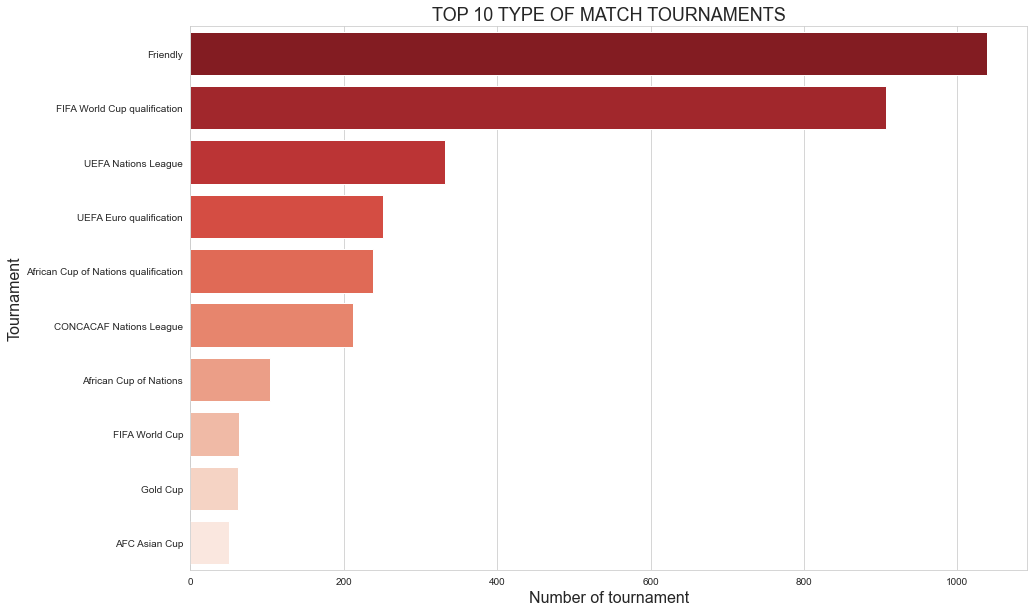

In [167]:
tournament = df['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=18)

In [168]:
# create two dataframe for the home and away teams
home = df[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = df[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})
# merge it into one
team_score = home.append(away).reset_index(drop=True)
# make an aggregation of the the score column group by the team
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})

Text(0.5, 1.0, 'TOP 10 OF GOAL AVERAGE PER MATCH')

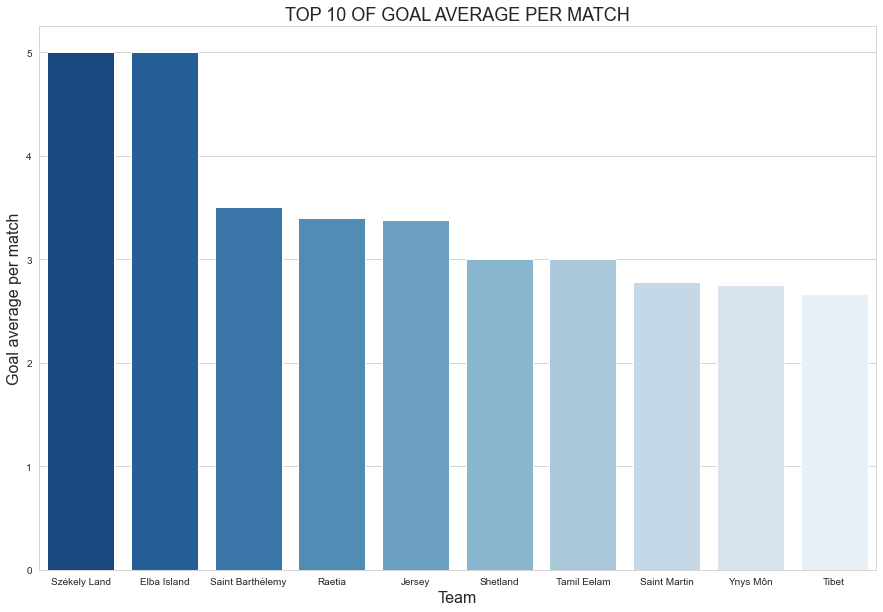

In [169]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='goal_avg', ascending=False)[:10]
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Goal average per match', size=16)
ax.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

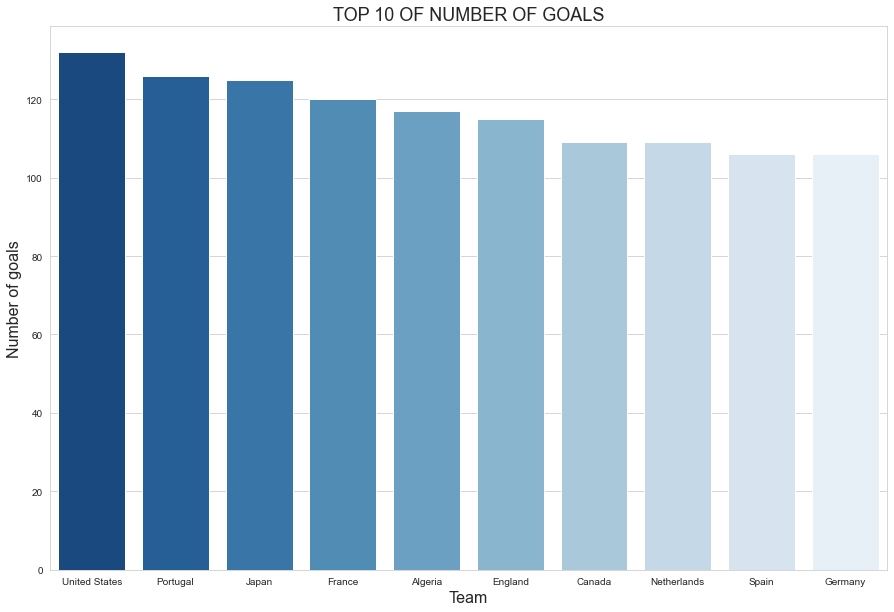

In [170]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_goals', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_goals", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title("TOP 10 OF NUMBER OF GOALS", fontsize=18)

del plt_data, country_info

In [171]:
world_cup = pd.read_csv("archive/Fifa_Worldcup_2022_Groups.csv")


world_cup.head()


,Group,Flag_Image,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Qatar,QAT,Ecuador,Senegal,Netherlands
1,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Ecuador,ECU,Qatar,Netherlands,Senegal
2,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Senegal,SEN,Netherlands,Qatar,Ecuador
3,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Netherlands,NED,Senegal,Ecuador,Qatar
4,B,https://cloudinary.fifa.com/api/v3/picture/fla...,England,ENG,Iran,USA,Wales


In [172]:
world_cup.columns

Index(['Group', 'Flag_Image', 'Team', 'Country_Name_Short',
       'First match against', 'Second match against', 'Third match against'],
      dtype='object')

In [173]:

world_cup = world_cup.replace({
                               "Korea Republic" : "South Korea","USA": "United States"})
world_cup = world_cup.set_index('Team')
world_cup.head()


,Group,Flag_Image,Country_Name_Short,First match against,Second match against,Third match against
Team,,,,,,
Qatar,A,https://cloudinary.fifa.com/api/v3/picture/fla...,QAT,Ecuador,Senegal,Netherlands
Ecuador,A,https://cloudinary.fifa.com/api/v3/picture/fla...,ECU,Qatar,Netherlands,Senegal
Senegal,A,https://cloudinary.fifa.com/api/v3/picture/fla...,SEN,Netherlands,Qatar,Ecuador
Netherlands,A,https://cloudinary.fifa.com/api/v3/picture/fla...,NED,Senegal,Ecuador,Qatar
England,B,https://cloudinary.fifa.com/api/v3/picture/fla...,ENG,Iran,United States,Wales


In [174]:
#Join Ranking with match 
df = df.merge(rank,
                         left_on=['date', 'home_team'],
                         right_on=['rank_date', 'country_full'])
# matches.head()

df = df.merge(rank, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], suffixes=('_home', '_away')) 
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,2020-09-03,Germany,Spain,1,1,UEFA Nations League,Stuttgart,Germany,False,2020-09-03,...,0.0,UEFA,2020-09-03,8.0,Spain,ESP,1636.0,1636.0,0.0,UEFA
1,2020-09-03,Ukraine,Switzerland,2,1,UEFA Nations League,Lviv,Ukraine,False,2020-09-03,...,0.0,UEFA,2020-09-03,12.0,Switzerland,SUI,1608.0,1608.0,0.0,UEFA
2,2020-09-03,Russia,Serbia,3,1,UEFA Nations League,Moscow,Russia,False,2020-09-03,...,0.0,UEFA,2020-09-03,29.0,Serbia,SRB,1494.0,1494.0,0.0,UEFA
3,2020-09-03,Turkey,Hungary,0,1,UEFA Nations League,Sivas,Turkey,False,2020-09-03,...,0.0,UEFA,2020-09-03,52.0,Hungary,HUN,1416.0,1416.0,0.0,UEFA
4,2020-09-03,Bulgaria,Republic of Ireland,1,1,UEFA Nations League,Sofia,Bulgaria,False,2020-09-03,...,0.0,UEFA,2020-09-03,34.0,Republic of Ireland,IRL,1486.0,1486.0,0.0,UEFA


<AxesSubplot:>

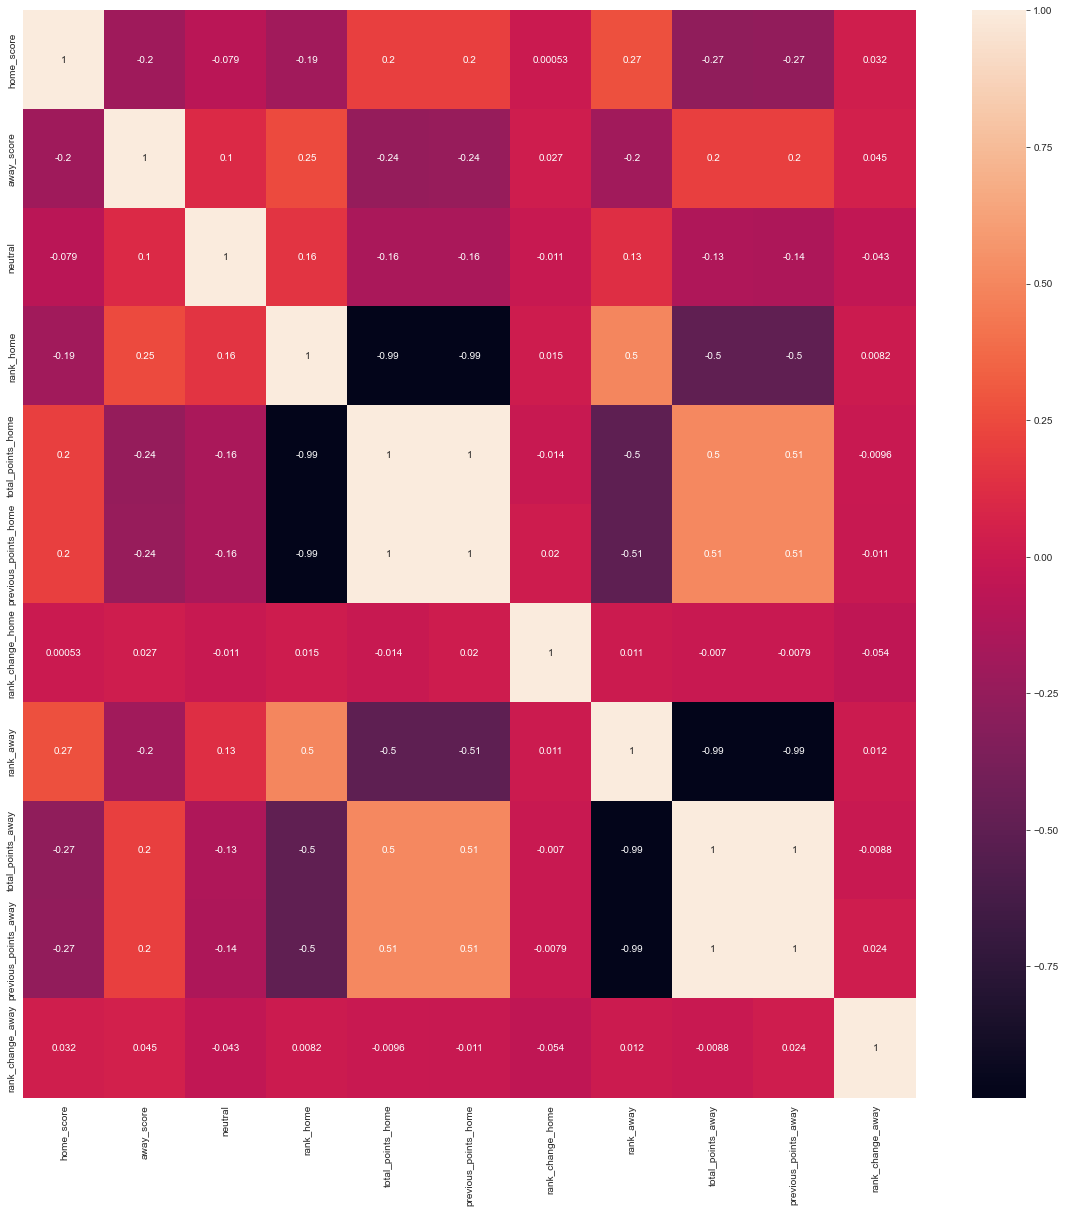

In [175]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = df.corr()
corr1
sns.heatmap(corr1,annot=True)

In [176]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away'],
      dtype='object')

In [177]:
# feature generation
df['rank_difference'] = df['rank_home'] - df['rank_away']
df['average_rank'] = (df['rank_home'] + df['rank_away'])/2
df['point_difference'] = df['total_points_home'] - df['total_points_away']
df['score_difference'] = df['home_score'] - df['away_score']
df['is_won'] = df['score_difference'] > 0 
df['is_stake'] = df['tournament'] != 'Friendly'



# I tried earlier rest days but it did not turn to be useful


# I tried earlier the team as well but that did not make a difference either
df['wc_participant'] = df['home_team'] * df['home_team'].isin(world_cup.index.tolist())
df['wc_participant'] = df['wc_participant'].replace({'':'Other'})
df = df.join(pd.get_dummies(df['wc_participant']))

In [178]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,Saudi Arabia,Senegal,Serbia,South Korea,Spain,Switzerland,Tunisia,United States,Uruguay,Wales
0,2020-09-03,Germany,Spain,1,1,UEFA Nations League,Stuttgart,Germany,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0
1,2020-09-03,Ukraine,Switzerland,2,1,UEFA Nations League,Lviv,Ukraine,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0
2,2020-09-03,Russia,Serbia,3,1,UEFA Nations League,Moscow,Russia,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0
3,2020-09-03,Turkey,Hungary,0,1,UEFA Nations League,Sivas,Turkey,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0
4,2020-09-03,Bulgaria,Republic of Ireland,1,1,UEFA Nations League,Sofia,Bulgaria,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0


In [179]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away',
       'rank_difference', 'average_rank', 'point_difference',
       'score_difference', 'is_won', 'is_stake', 'wc_participant', 'Argentina',
       'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada', 'Costa Rica',
       'Croatia', 'Denmark', 'Ecuador', 'England', 'France', 'Germany',
       'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Netherlands', 'Other',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'South Korea', 'Spain', 'Switzerland', 'Tunisia', 'United States',
       

In [180]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

In [181]:
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], df['is_won']


In [182]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [183]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [184]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.6947890818858561
ROC Area under Curve = 0.6956081914631137
Cohen's Kappa = 0.39015268020816674
Time taken = 0.03755688667297363
              precision    recall  f1-score   support

       False    0.72081   0.67619   0.69779       210
        True    0.66990   0.71503   0.69173       193

    accuracy                        0.69479       403
   macro avg    0.69536   0.69561   0.69476       403
weighted avg    0.69643   0.69479   0.69489       403



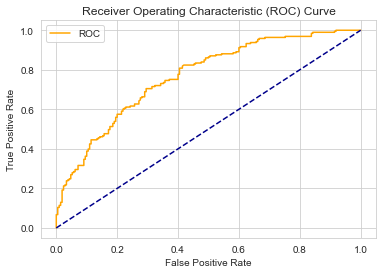

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



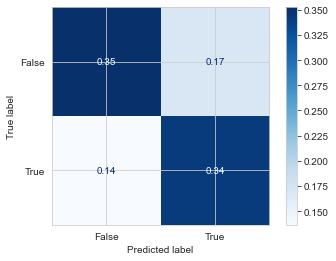

In [185]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.6104218362282878
ROC Area under Curve = 0.6092030594621267
Cohen's Kappa = 0.21863538129052174
Time taken = 0.06908583641052246
              precision    recall  f1-score   support

       False    0.62326   0.63810   0.63059       210
        True    0.59574   0.58031   0.58793       193

    accuracy                        0.61042       403
   macro avg    0.60950   0.60920   0.60926       403
weighted avg    0.61008   0.61042   0.61016       403



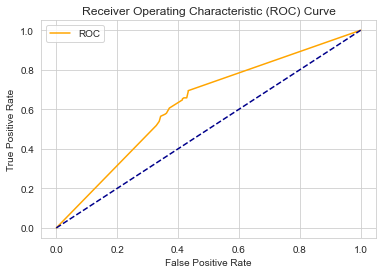

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



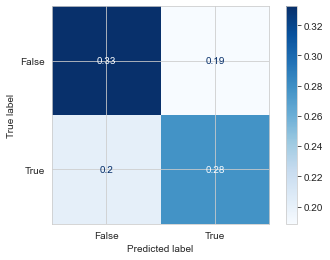

In [65]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Accuracy = 0.6799007444168734
ROC Area under Curve = 0.6783863804589193
Cohen's Kappa = 0.3574474396529348
Time taken = 116.45716714859009
              precision    recall  f1-score   support

       False    0.68493   0.71429   0.69930       210
        True    0.67391   0.64249   0.65782       193

    accuracy                        0.67990       403
   macro avg    0.67942   0.67839   0.67856       403
weighted avg    0.67965   0.67990   0.67944       403



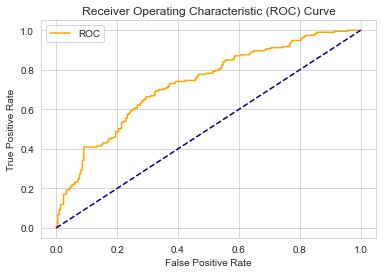

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



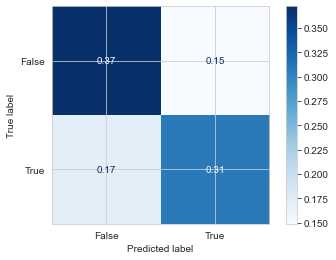

In [66]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.630272952853598
ROC Area under Curve = 0.6286701208981003
Cohen's Kappa = 0.2578268876611418
Time taken = 1.0582900047302246
              precision    recall  f1-score   support

       False    0.63927   0.66667   0.65268       210
        True    0.61957   0.59067   0.60477       193

    accuracy                        0.63027       403
   macro avg    0.62942   0.62867   0.62873       403
weighted avg    0.62983   0.63027   0.62974       403



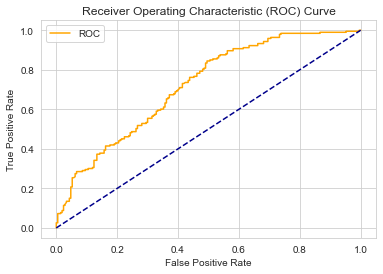

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



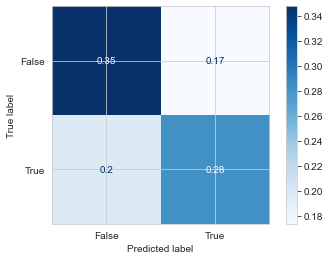

In [67]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [68]:
import lightgbm as lgb

params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

OSError: dlopen(/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lightgbm/lib/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: image not found

Accuracy = 0.6153846153846154
ROC Area under Curve = 0.6150135701949173
Cohen's Kappa = 0.2298825066883653
Time taken = 28.690601348876953
              precision    recall  f1-score   support

       False    0.63285   0.62381   0.62830       210
        True    0.59694   0.60622   0.60154       193

    accuracy                        0.61538       403
   macro avg    0.61489   0.61501   0.61492       403
weighted avg    0.61565   0.61538   0.61548       403



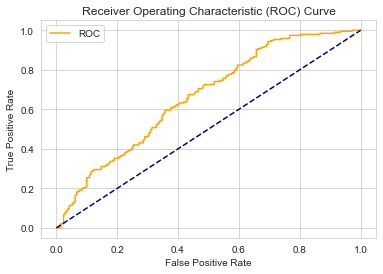

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



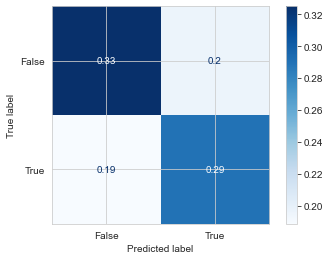

In [69]:
import xgboost as xgb
params_xgb ={'n_estimators': 1000,
            'max_depth': 128}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [186]:
rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2020-02-20,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
1,2020-02-21,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
2,2020-02-22,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
3,2020-02-23,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
4,2020-02-24,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC


In [187]:
margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = rank.loc[(rank['rank_date'] == rank['rank_date'].max()) & 
                                    rank['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])
print(world_cup_rankings.shape)


(32, 7)


In [188]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group B:___
England vs. Iran: England wins with 0.66
England vs. United States: England wins with 0.56
England vs. Wales: England wins with 0.65
Iran vs. United States: United States wins with 0.69
Iran vs. Wales: Wales wins with 0.60
United States vs. Wales: Draw
___Starting group A:___
Qatar vs. Ecuador: Ecuador wins with 0.62
Qatar vs. Senegal: Senegal wins with 0.76
Qatar vs. Netherlands: Netherlands wins with 0.87
Ecuador vs. Senegal: Senegal wins with 0.74
Ecuador vs. Netherlands: Netherlands wins with 0.85
Senegal vs. Netherlands: Netherlands wins with 0.75
___Starting group G:___
Brazil vs. Serbia: Brazil wins with 0.80
Brazil vs. Switzerland: Brazil wins with 0.72
Brazil vs. Cameroon: Brazil wins with 0.87
Serbia vs. Switzerland: Switzerland wins with 0.70
Serbia vs. Cameroon: Draw
Switzerland vs. Cameroon: Switzerland wins with 0.65
___Starting group H:___
Portugal vs. Ghana: Portugal wins with 0.78
Portugal vs. Uruguay: Draw
Portugal vs. South Korea: Portugal win

In [190]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
print(next_round_wc.shape)
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        if model_lr.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

(16, 9)
___Starting of the round_of_16___
Netherlands vs. United States: Netherlands wins with probability 0.51
Argentina vs. Denmark: Argentina wins with probability 0.57
Spain vs. Croatia: Spain wins with probability 0.51
Brazil vs. Portugal: Brazil wins with probability 0.66
Senegal vs. England: England wins with probability 0.79
Mexico vs. France: France wins with probability 0.75
Germany vs. Belgium: Belgium wins with probability 0.81
Switzerland vs. Uruguay: Uruguay wins with probability 0.60


___Starting of the quarterfinal___
Netherlands vs. Argentina: Argentina wins with probability 0.71
Spain vs. Brazil: Brazil wins with probability 0.77
England vs. France: France wins with probability 0.65
Belgium vs. Uruguay: Belgium wins with probability 0.68


___Starting of the semifinal___
Argentina vs. Brazil: Brazil wins with probability 0.70
France vs. Belgium: Belgium wins with probability 0.68


___Starting of the final___
Brazil vs. Belgium: Belgium wins with probability 0.56




In [74]:
next_round_wc = world_cup.groupby('Group').nth([0, 1]) 
teams_through = next_round_wc['Team']


In [75]:
teams_through

Group
A      Netherlands
A          Senegal
B          England
B    United States
C        Argentina
C           Mexico
D           France
D          Denmark
E            Spain
E          Germany
F          Belgium
F          Croatia
G           Brazil
G      Switzerland
H          Uruguay
H         Portugal
Name: Team, dtype: object

/var/folders/vc/hp1kfbmj7lb7k9nhyd12slww0000gn/T/ipykernel_32999/2627356831.py:8: DeprecationWarning:

nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723



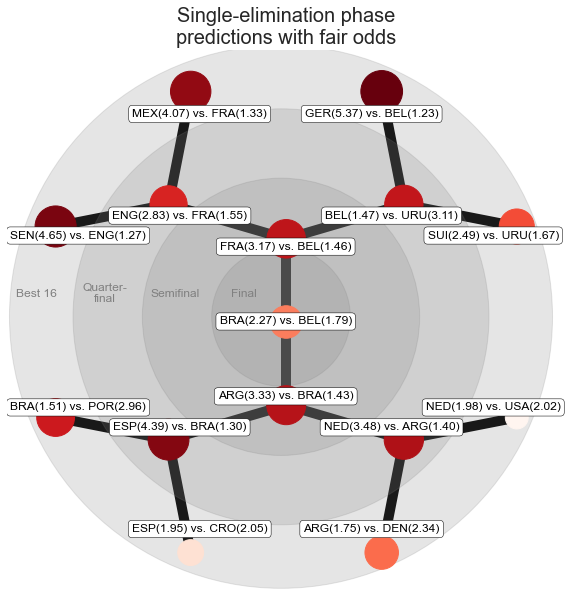

In [76]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

node_sizes = pd.DataFrame(list(reversed(odds)))
scale_factor = 0.3 # for visualization
G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
centre = pd.DataFrame(pos).mean(axis=1).mean()

plt.figure(figsize=(10, 10))
ax = plt.subplot(1,1,1)
# add circles 
circle_positions = [(235, 'black'), (180, 'blue'), (120, 'red'), (60, 'yellow')]
[ax.add_artist(plt.Circle((centre, centre), 
                          cp, color='grey', 
                          alpha=0.2)) for cp, c in circle_positions]

# draw first the graph
nx.draw(G, pos, 
        node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor), 
        node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000, 
        alpha=1, 
        cmap='Reds',
        edge_color='black',
        width=10,
        with_labels=False)

# draw the custom node labels
shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
nx.draw_networkx_labels(G, 
                        pos=shifted_pos, 
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=dict(zip(reversed(range(len(labels))), labels)))

texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
[plt.text(p, centre+20, t, 
          fontsize=12, color='grey', 
          va='center', ha='center') for p,t,c in texts]
plt.axis('equal')
plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
plt.show()
